In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas_datareader as pdr
import datetime

# using aplha vantage

In [81]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import pandas
api_key='YMMGKY70LFXG7QH6'
ts=TimeSeries(key=api_key,output_format='pandas')
data,mata_data=ts.get_intraday('MSFT',interval='1min')
data

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2021-01-15 20:00:00,212.45,212.4500,212.4500,212.4500,342.0
2021-01-15 19:58:00,212.50,212.5000,212.5000,212.5000,177.0
2021-01-15 19:55:00,212.50,212.5000,212.5000,212.5000,700.0
2021-01-15 19:54:00,212.50,212.5000,212.5000,212.5000,251.0
2021-01-15 19:53:00,212.55,212.5500,212.5500,212.5500,170.0
...,...,...,...,...,...
2021-01-15 16:16:00,212.45,212.4500,212.4500,212.4500,360.0
2021-01-15 16:15:00,212.45,212.6500,212.3400,212.6500,125177.0
2021-01-15 16:14:00,212.46,212.4700,212.4600,212.4700,15062.0


# visualizing close price of stock

Text(0, 0.5, 'price')

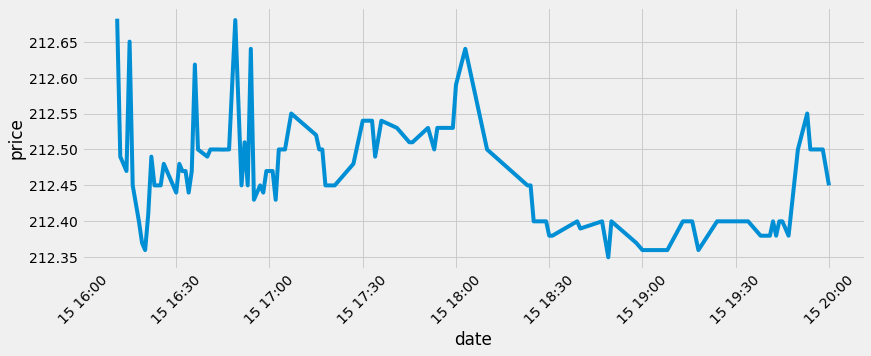

In [82]:
plt.figure(figsize=(12.5,4.5))
plt.plot(data['4. close'],label='close')
plt.xticks(rotation=45)
plt.xlabel('date')
plt.ylabel("price")

# Trading Strategy Using MACD

In [83]:
shortEMA=data['4. close'].ewm(span=12,adjust=False).mean()
longEMA=data['4. close'].ewm(span=26,adjust=False).mean()
MACD=shortEMA-longEMA
signal=MACD.ewm(span=9,adjust=False).mean()

## when blue line comming from the down and cross the red we buy the stock and wher red line comes up crossing the blue line the sell the stock

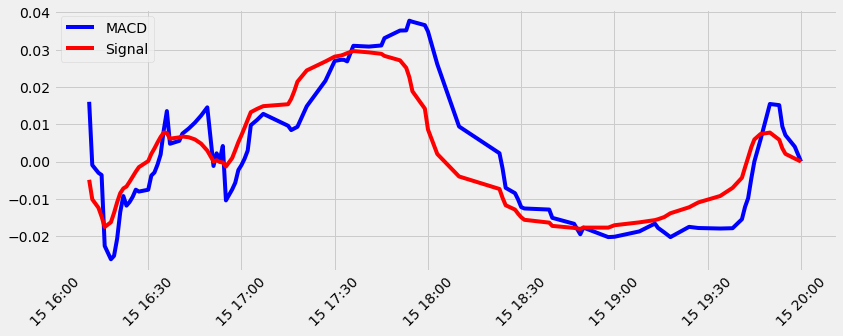

In [84]:
plt.figure(figsize=(12.5,4.5))
plt.plot(data.index,MACD,label='MACD',color='blue')
plt.plot(data.index,signal,label='Signal',color='red')
plt.xticks(rotation=45)
plt.legend(loc='upper left')


In [85]:
data['MACD']=MACD
data["Signal_line"]=signal
data

,1. open,2. high,3. low,4. close,5. volume,MACD,Signal_line
date,,,,,,,
2021-01-15 20:00:00,212.45,212.4500,212.4500,212.4500,342.0,0.000000,0.000000
2021-01-15 19:58:00,212.50,212.5000,212.5000,212.5000,177.0,0.003989,0.000798
2021-01-15 19:55:00,212.50,212.5000,212.5000,212.5000,700.0,0.007068,0.002052
2021-01-15 19:54:00,212.50,212.5000,212.5000,212.5000,251.0,0.009400,0.003522
2021-01-15 19:53:00,212.55,212.5500,212.5500,212.5500,170.0,0.015109,0.005839
...,...,...,...,...,...,...,...
2021-01-15 16:16:00,212.45,212.4500,212.4500,212.4500,360.0,-0.022617,-0.017536
2021-01-15 16:15:00,212.45,212.6500,212.3400,212.6500,125177.0,-0.003607,-0.014750
2021-01-15 16:14:00,212.46,212.4700,212.4600,212.4700,15062.0,-0.003031,-0.012406


# buying and selling stocks 

In [86]:
def buy_sell(df):
    buy=[]
    sell=[]
    flag=-1
    for i in range(len(df)):
        if df['MACD'][i]<df['Signal_line'][i]:
            sell.append(np.nan)
            if flag !=1:
                buy.append(df['4. close'][i])
                flag=1
            else:
                buy.append(np.nan)
        elif df['MACD'][i]>df['Signal_line'][i]:
            buy.append(np.nan)
            if flag !=0:
                sell.append(df['4. close'][i])
                flag =0
            else:
                sell.append(np.nan)
        else:
            buy.append(np.nan)
            sell.append(np.nan)
    return(buy,sell)
                
                

In [87]:
a=buy_sell(data)
a
data['buy_signal_price']=a[0]
data['sell_signal_price']=a[1]

# visualizing buy and sell markers on the stock prices

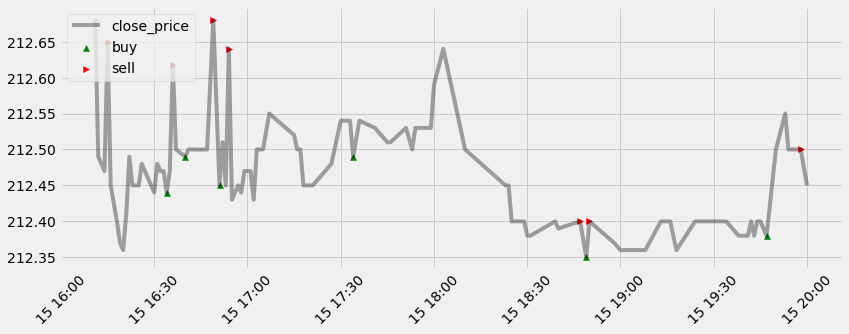

In [88]:
plt.figure(figsize=(12.5,4.5))
plt.scatter(data.index,data['buy_signal_price'],label='buy',marker='^',color='green')
plt.scatter(data.index,data['sell_signal_price'],label='sell',marker='>',color='red')
plt.plot(data['4. close'],label='close_price',alpha=0.35,color='black')
#plt.title('close price buy and sell signal')
#plt.xlabel('date')
#plt.ylabel('close price')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.legend(loc='upper left')